In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
data = pd.read_csv('Final Dataset v2.csv')
data.head()

,Year,"Self-Sufficiency: Coal, peat and oil shale","Self-Sufficiency: Crude, NGL and feedstocks",Self-Sufficiency: Natural Gas,Self-Sufficiency: Renewables and waste,Self-Sufficiency: Total,Self-Sufficiency: Oil Products,Total Production (PJ),Total energy supply (PJ),Imports (PJ),Exports (PJ),Renewables and Waste Production (PJ),"Coal, peat and oil shale Production (PJ)","Crude, NGL and feedstocks Production (PJ)",Oil products Production (PJ),Natural gas Production (PJ)
0,1971,0.978158,0.386952,0.0,1.0,0.706588,0,578.201853,818.301548,260.221000,-4.391740,253.773001,176.683253,147.745599,0,0.0
1,1972,0.999671,0.308000,0.0,1.0,0.684972,0,633.039454,924.182785,350.463802,-37.614203,274.688001,213.345051,145.006402,0,0.0
2,1973,1.012233,0.270472,0.0,1.0,0.637463,0,650.046947,1019.740270,405.865587,-35.237599,281.573797,218.202350,150.270800,0,0.0
3,1974,1.000581,0.255127,0.0,1.0,0.630358,0,665.195903,1055.267470,448.399443,-30.692401,289.476600,234.094103,141.625201,0,0.0
4,1975,0.992147,0.237078,0.0,1.0,0.607811,0,680.921365,1120.284928,450.804826,-22.013596,309.155401,239.257165,132.508799,0,0.0


In [3]:
data.tail()

,Year,"Self-Sufficiency: Coal, peat and oil shale","Self-Sufficiency: Crude, NGL and feedstocks",Self-Sufficiency: Natural Gas,Self-Sufficiency: Renewables and waste,Self-Sufficiency: Total,Self-Sufficiency: Oil Products,Total Production (PJ),Total energy supply (PJ),Imports (PJ),Exports (PJ),Renewables and Waste Production (PJ),"Coal, peat and oil shale Production (PJ)","Crude, NGL and feedstocks Production (PJ)",Oil products Production (PJ),Natural gas Production (PJ)
46,2017,0.391183,0.092223,0.006592,1.000015,0.251182,0,1543.966491,6146.809950,5192.304681,-325.721070,762.343673,656.572619,112.842600,0,12.207599
47,2018,0.405228,0.120824,0.008565,0.999994,0.279936,0,1690.071137,6037.350657,4828.188310,-249.966057,856.571488,692.776746,126.014202,0,14.708702
48,2019,0.415934,0.088429,0.010520,1.000000,0.311914,0,1913.332213,6134.170520,4829.334844,-400.625392,1035.332114,729.702798,131.981200,0,16.316102
49,2020,0.375348,0.098603,0.009149,1.000000,0.301265,0,1853.213697,6151.443913,4747.801779,-359.792892,1072.628589,628.287825,137.085148,0,15.212135
50,2021,0.410821,0.100504,0.006598,1.000000,0.290738,0,1926.300470,6625.551744,5147.191613,-349.742730,1074.839876,690.588603,147.303050,0,13.568941


In [4]:
data.shape

(51, 16)

In [5]:
data.columns

Index(['Year', 'Self-Sufficiency: Coal, peat and oil shale',
       'Self-Sufficiency: Crude, NGL and feedstocks',
       'Self-Sufficiency: Natural Gas',
       'Self-Sufficiency: Renewables and waste', 'Self-Sufficiency: Total',
       'Self-Sufficiency: Oil Products', 'Total Production (PJ)',
       'Total energy supply (PJ)', 'Imports (PJ)', 'Exports (PJ)',
       'Renewables and Waste Production (PJ)',
       'Coal, peat and oil shale Production (PJ)',
       'Crude, NGL and feedstocks Production (PJ)',
       'Oil products Production (PJ)', 'Natural gas Production (PJ)'],
      dtype='object')

In [6]:
# Random Forest Model

# Extract the features and target variable
X = data.drop('Self-Sufficiency: Total', axis=1) 
y = data['Self-Sufficiency: Total'] #'Self-Sufficiency: Total' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the random forest model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the performance of the model using R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9784600260641237


In [7]:
# SVM Model

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create an SVM model
svm = SVR(kernel='linear')

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = svm.predict(X_test)

# Evaluate the performance of the model using R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.7619931802069251


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = math.sqrt(mse)

# Print the mean squared error, mean absolute error and root mean squared error
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Squared Error (MSE): 0.004423657361195399
Mean Absolute Error (MAE): 0.0597233595134764
Root Mean Squared Error (RMSE): 0.06651058082136556


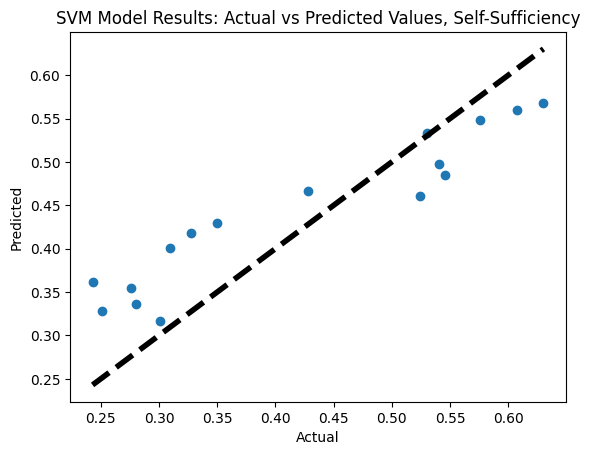

In [10]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)

# Add a diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)

# Set the axis labels
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Model Results: Actual vs Predicted Values, Self-Sufficiency')

# Show the plot
plt.show()

In [11]:
#OLS Regression

ks = sm.OLS(y, X)
ks_res =ks.fit()
ks_res.summary()

/Users/oyazaimoglu/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Self-Sufficiency: Total   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                              3963.
Date:                     Thu, 13 Apr 2023   Prob (F-statistic):                    2.67e-55
Time:                             15:40:12   Log-Likelihood:                          152.71
No. Observations:                       51   AIC:                                     -279.4
Df Residuals:                           38   BIC:                                     -254.3
Df Model:                               13                                                  
Covariance Type:                 nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Year                                           -0.0003      0.000     -0.899      0.374      -0.001       0.000
Self-Sufficiency: Coal, peat and oil shale      0.2090      0.045      4.680      0.000       0.119       0.299
Self-Sufficiency: Crude, NGL and feedstocks     0.7186      0.083      8.648      0.000       0.550       0.887
Self-Sufficiency: Natural Gas                   0.0432      0.009      4.699      0.000       0.025       0.062
Self-Sufficiency: Renewables and waste          0.6821      0.567      1.202      0.237      -0.467       1.831
Self-Sufficiency: Oil Products              -1.666e-06   3.22e-06     -0.517      0.608   -8.19e-06    4.85e-06
Total Production (PJ)                        4599.7303   8892.748      0.517      0.608   -1.34e+04    2.26e+04
Total energy supply (PJ)                       -0.0002   5.82e-05     -4.217      0.000      -0.000      -0.000
Imports (PJ)                                    0.0002   5.28e-05      3.046      0.004    5.39e-05       0.000
Exports (PJ)                                -1.964e-05   7.48e-05     -0.263      0.794      -0.000       0.000
Renewables and Waste Production (PJ)        -4599.7298   8892.748     -0.517      0.608   -2.26e+04    1.34e+04
Coal, peat and oil shale Production (PJ)    -4599.7300   8892.748     -0.517      0.608   -2.26e+04    1.34e+04
Crude, NGL and feedstocks Production (PJ)   -4599.7301   8892.748     -0.517      0.608   -2.26e+04    1.34e+04
Oil products Production (PJ)                         0          0        nan        nan           0           0
Natural gas Production (PJ)                 -4599.7303   8892.748     -0.517      0.608   -2.26e+04    1.34e+04
==============================================================================
Omnibus:                        4.401   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.517
Skew:                          -0.628   Prob(JB):                        0.172
Kurtosis:                       3.280   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Checking for colinearity

import seaborn as sns
sns.pairplot(X);

In [14]:
# review correlation coefficients for multicollinearity
corr = round(data.corr(),2)
corr

,Year,"Self-Sufficiency: Coal, peat and oil shale","Self-Sufficiency: Crude, NGL and feedstocks",Self-Sufficiency: Natural Gas,Self-Sufficiency: Renewables and waste,Self-Sufficiency: Total,Self-Sufficiency: Oil Products,Total Production (PJ),Total energy supply (PJ),Imports (PJ),Exports (PJ),Renewables and Waste Production (PJ),"Coal, peat and oil shale Production (PJ)","Crude, NGL and feedstocks Production (PJ)",Oil products Production (PJ),Natural gas Production (PJ)
Year,1.00,-0.98,-0.73,-0.28,-0.22,-0.96,NaN,0.91,0.97,0.97,-0.91,0.76,0.92,-0.15,NaN,0.75
"Self-Sufficiency: Coal, peat and oil shale",-0.98,1.00,0.69,0.32,0.22,0.96,NaN,-0.84,-0.94,-0.94,0.89,-0.70,-0.86,0.12,NaN,-0.77
"Self-Sufficiency: Crude, NGL and feedstocks",-0.73,0.69,1.00,-0.14,0.08,0.77,NaN,-0.63,-0.63,-0.61,0.59,-0.48,-0.75,0.48,NaN,-0.63
Self-Sufficiency: Natural Gas,-0.28,0.32,-0.14,1.00,0.07,0.32,NaN,-0.21,-0.30,-0.31,0.25,-0.17,-0.17,-0.36,NaN,-0.21
Self-Sufficiency: Renewables and waste,-0.22,0.22,0.08,0.07,1.00,0.24,NaN,-0.09,-0.21,-0.24,0.29,-0.06,-0.13,0.10,NaN,-0.13
Self-Sufficiency: Total,-0.96,0.96,0.77,0.32,0.24,1.00,NaN,-0.77,-0.90,-0.91,0.86,-0.60,-0.86,0.27,NaN,-0.81
Self-Sufficiency: Oil Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Production (PJ),0.91,-0.84,-0.63,-0.21,-0.09,-0.77,NaN,1.00,0.93,0.89,-0.82,0.93,0.89,0.08,NaN,0.53
Total energy supply (PJ),0.97,-0.94,-0.63,-0.30,-0.21,-0.90,NaN,0.93,1.00,0.99,-0.93,0.84,0.87,-0.11,NaN,0.66
Imports (PJ),0.97,-0.94,-0.61,-0.31,-0.24,-0.91,NaN,0.89,0.99,1.00,-0.95,0.80,0.84,-0.16,NaN,0.67


In [17]:
# remove highly correlated fields to prevent multicollinearity


data2 = data[['Self-Sufficiency: Total','Self-Sufficiency: Crude, NGL and feedstocks','Self-Sufficiency: Natural Gas', 'Imports (PJ)', 'Exports (PJ)','Natural gas Production (PJ)']]
data2.head()

,Self-Sufficiency: Total,"Self-Sufficiency: Crude, NGL and feedstocks",Self-Sufficiency: Natural Gas,Imports (PJ),Exports (PJ),Natural gas Production (PJ)
0,0.706588,0.386952,0.0,260.221000,-4.391740,0.0
1,0.684972,0.308000,0.0,350.463802,-37.614203,0.0
2,0.637463,0.270472,0.0,405.865587,-35.237599,0.0
3,0.630358,0.255127,0.0,448.399443,-30.692401,0.0
4,0.607811,0.237078,0.0,450.804826,-22.013596,0.0


In [18]:
#OLS Regression

X2 = data2.drop('Self-Sufficiency: Total', axis=1) 
y2 = data2['Self-Sufficiency: Total'] #'Self-Sufficiency: Total' is the target variable

ks = sm.OLS(y2, X2)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Self-Sufficiency: Total   R-squared (uncentered):                   0.967
Model:                                 OLS   Adj. R-squared (uncentered):              0.963
Method:                      Least Squares   F-statistic:                              269.5
Date:                     Thu, 13 Apr 2023   Prob (F-statistic):                    7.25e-33
Time:                             15:42:48   Log-Likelihood:                          55.758
No. Observations:                       51   AIC:                                     -101.5
Df Residuals:                           46   BIC:                                     -91.86
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Self-Sufficiency: Crude, NGL and feedstocks     2.4785      0.103     24.179      0.000       2.272       2.685
Self-Sufficiency: Natural Gas                   0.2558      0.040      6.449      0.000       0.176       0.336
Imports (PJ)                                 2.098e-05   2.35e-05      0.894      0.376   -2.63e-05    6.82e-05
Exports (PJ)                                    0.0003      0.000      0.946      0.349      -0.000       0.001
Natural gas Production (PJ)                     0.0023      0.002      1.377      0.175      -0.001       0.006
==============================================================================
Omnibus:                        7.294   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               13.347
Skew:                           0.031   Prob(JB):                      0.00126
Kurtosis:                       5.505   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
mod1 = sm.OLS(y2, X2)
mod1_res = mod1.fit()
mod1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Self-Sufficiency: Total   R-squared (uncentered):                   0.967
Model:                                 OLS   Adj. R-squared (uncentered):              0.963
Method:                      Least Squares   F-statistic:                              269.5
Date:                     Thu, 13 Apr 2023   Prob (F-statistic):                    7.25e-33
Time:                             15:42:52   Log-Likelihood:                          55.758
No. Observations:                       51   AIC:                                     -101.5
Df Residuals:                           46   BIC:                                     -91.86
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Self-Sufficiency: Crude, NGL and feedstocks     2.4785      0.103     24.179      0.000       2.272       2.685
Self-Sufficiency: Natural Gas                   0.2558      0.040      6.449      0.000       0.176       0.336
Imports (PJ)                                 2.098e-05   2.35e-05      0.894      0.376   -2.63e-05    6.82e-05
Exports (PJ)                                    0.0003      0.000      0.946      0.349      -0.000       0.001
Natural gas Production (PJ)                     0.0023      0.002      1.377      0.175      -0.001       0.006
==============================================================================
Omnibus:                        7.294   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               13.347
Skew:                           0.031   Prob(JB):                      0.00126
Kurtosis:                       5.505   Cond. No.                     2.29e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
corr2 = round(data2.corr(),2)
corr2

,Self-Sufficiency: Total,"Self-Sufficiency: Crude, NGL and feedstocks",Self-Sufficiency: Natural Gas,Imports (PJ),Exports (PJ),Natural gas Production (PJ)
Self-Sufficiency: Total,1.00,0.77,0.32,-0.91,0.86,-0.81
"Self-Sufficiency: Crude, NGL and feedstocks",0.77,1.00,-0.14,-0.61,0.59,-0.63
Self-Sufficiency: Natural Gas,0.32,-0.14,1.00,-0.31,0.25,-0.21
Imports (PJ),-0.91,-0.61,-0.31,1.00,-0.95,0.67
Exports (PJ),0.86,0.59,0.25,-0.95,1.00,-0.70
Natural gas Production (PJ),-0.81,-0.63,-0.21,0.67,-0.70,1.00


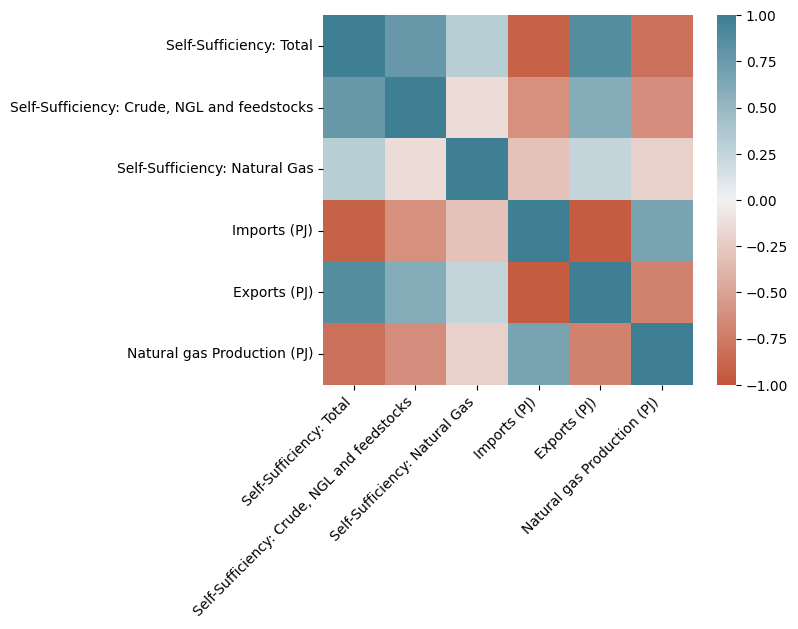

In [27]:
ax = sns.heatmap(
    corr2, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

/var/folders/72/bdcjdw7170n5n6xnyz6plhfm0000gn/T/ipykernel_54049/889907691.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mod1_res.resid, fit=stats.norm);


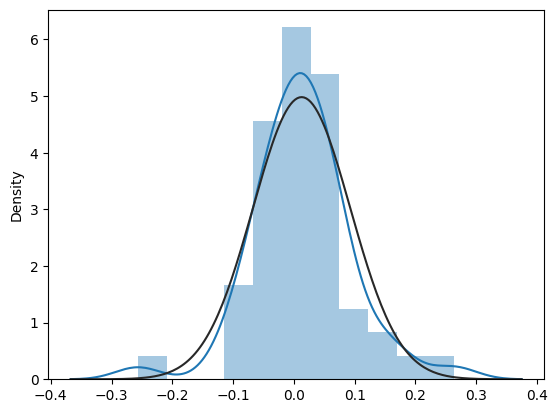

In [21]:
from scipy import stats
import seaborn as sns

sns.distplot(mod1_res.resid, fit=stats.norm);

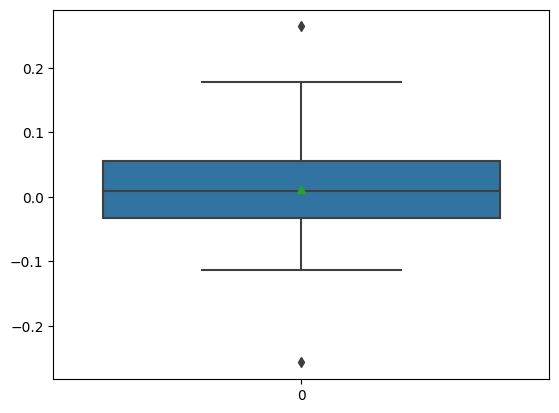

In [22]:
sns.boxplot(mod1_res.resid, showmeans=True);

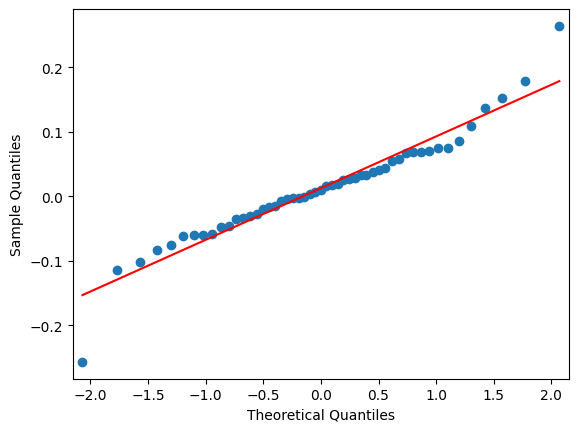

In [23]:
sm.qqplot(mod1_res.resid, line='s');

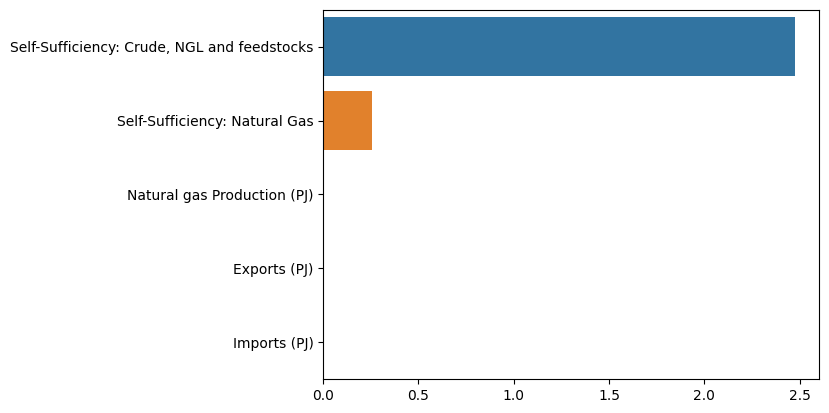

In [24]:
coeff = mod1_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');